In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models

In [2]:
transform = transforms.Compose([
    transforms.Resize((512,512)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAffine(10, shear=10, scale=(0.8, 1.2)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(r'output\train', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

val_dataset = datasets.ImageFolder(r'output\val', transform=transform)
val_loader = DataLoader(val_dataset, batch_size=8)

test_dataset = datasets.ImageFolder(r'output\test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=8)

In [3]:
device = torch.device('cuda:0') if torch.cuda.is_available() else "cpu"

In [4]:
device

device(type='cuda', index=0)

In [5]:
model = models.densenet201(pretrained=True)
num_features = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_features, 512),
    nn.ReLU(),
    nn.Linear(512, 128),
    nn.ReLU(),
    nn.Linear(128, 3)  
)
model.to(device)

c:\Users\IIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\IIIT\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet201_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet201_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

100%|██████████| 307/307 [02:50<00:00,  1.80it/s]


Epoch 1/50, Loss: 0.6920951948856103
Validation Accuracy: 68.1967213114754%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 2/50, Loss: 0.546202469435111
Validation Accuracy: 78.68852459016394%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 3/50, Loss: 0.4652218826430628
Validation Accuracy: 75.73770491803279%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 4/50, Loss: 0.474334980309592
Validation Accuracy: 72.78688524590164%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 5/50, Loss: 0.4569203034862391
Validation Accuracy: 68.85245901639344%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 6/50, Loss: 0.4325030091967956
Validation Accuracy: 80.98360655737706%


100%|██████████| 307/307 [02:33<00:00,  1.99it/s]


Epoch 7/50, Loss: 0.422537231927052
Validation Accuracy: 76.72131147540983%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 8/50, Loss: 0.40635332980281175
Validation Accuracy: 76.72131147540983%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 9/50, Loss: 0.3780145811293189
Validation Accuracy: 87.21311475409837%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 10/50, Loss: 0.3800771540570822
Validation Accuracy: 84.26229508196721%


100%|██████████| 307/307 [02:33<00:00,  1.99it/s]


Epoch 11/50, Loss: 0.3736189241105454
Validation Accuracy: 72.78688524590164%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 12/50, Loss: 0.33515923945324233
Validation Accuracy: 90.81967213114754%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 13/50, Loss: 0.33876408320466356
Validation Accuracy: 88.52459016393442%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 14/50, Loss: 0.3148163484245636
Validation Accuracy: 88.85245901639345%


100%|██████████| 307/307 [02:34<00:00,  1.98it/s]


Epoch 15/50, Loss: 0.3099399611705775
Validation Accuracy: 88.52459016393442%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 16/50, Loss: 0.2877424252629037
Validation Accuracy: 86.22950819672131%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 17/50, Loss: 0.29744398908792763
Validation Accuracy: 92.1311475409836%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 18/50, Loss: 0.2724413628559499
Validation Accuracy: 85.90163934426229%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 19/50, Loss: 0.276218851888704
Validation Accuracy: 94.42622950819673%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 20/50, Loss: 0.2667894812789215
Validation Accuracy: 92.1311475409836%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 21/50, Loss: 0.25186103235335616
Validation Accuracy: 85.24590163934425%


100%|██████████| 307/307 [02:34<00:00,  1.98it/s]


Epoch 22/50, Loss: 0.23576815236823978
Validation Accuracy: 93.44262295081968%


100%|██████████| 307/307 [02:33<00:00,  1.99it/s]


Epoch 23/50, Loss: 0.24698049820965634
Validation Accuracy: 94.09836065573771%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 24/50, Loss: 0.24553757995907036
Validation Accuracy: 92.1311475409836%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 25/50, Loss: 0.21578917757028573
Validation Accuracy: 89.50819672131148%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 26/50, Loss: 0.22025901970835796
Validation Accuracy: 91.14754098360656%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 27/50, Loss: 0.19148471082825402
Validation Accuracy: 93.77049180327869%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 28/50, Loss: 0.19546220737815825
Validation Accuracy: 91.80327868852459%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 29/50, Loss: 0.18948513615560938
Validation Accuracy: 96.06557377049181%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 30/50, Loss: 0.1987154079299323
Validation Accuracy: 92.1311475409836%


100%|██████████| 307/307 [02:33<00:00,  1.99it/s]


Epoch 31/50, Loss: 0.22579020615257567
Validation Accuracy: 94.75409836065573%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 32/50, Loss: 0.1706553412084119
Validation Accuracy: 93.44262295081968%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 33/50, Loss: 0.17417007935171225
Validation Accuracy: 96.06557377049181%


100%|██████████| 307/307 [02:34<00:00,  1.99it/s]


Epoch 34/50, Loss: 0.16596961381628272
Validation Accuracy: 92.1311475409836%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 35/50, Loss: 0.16123099050655998
Validation Accuracy: 94.75409836065573%


100%|██████████| 307/307 [02:33<00:00,  2.00it/s]


Epoch 36/50, Loss: 0.1613506963237641
Validation Accuracy: 94.09836065573771%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 37/50, Loss: 0.14554164183806895
Validation Accuracy: 88.19672131147541%


100%|██████████| 307/307 [02:43<00:00,  1.87it/s]


Epoch 38/50, Loss: 0.151395680208604
Validation Accuracy: 93.44262295081968%


100%|██████████| 307/307 [02:44<00:00,  1.87it/s]


Epoch 39/50, Loss: 0.154406419882387
Validation Accuracy: 90.1639344262295%


100%|██████████| 307/307 [02:46<00:00,  1.84it/s]


Epoch 40/50, Loss: 0.1549089762930347
Validation Accuracy: 95.73770491803279%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 41/50, Loss: 0.14217179028392415
Validation Accuracy: 91.14754098360656%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 42/50, Loss: 0.1427405557619083
Validation Accuracy: 95.73770491803279%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 43/50, Loss: 0.10731313737695741
Validation Accuracy: 95.73770491803279%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 44/50, Loss: 0.1347156380144318
Validation Accuracy: 91.80327868852459%


100%|██████████| 307/307 [02:42<00:00,  1.88it/s]


Epoch 45/50, Loss: 0.12816340314942573
Validation Accuracy: 93.44262295081968%


100%|██████████| 307/307 [02:42<00:00,  1.88it/s]


Epoch 46/50, Loss: 0.15599573499118113
Validation Accuracy: 96.06557377049181%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 47/50, Loss: 0.1119843129534938
Validation Accuracy: 96.06557377049181%


100%|██████████| 307/307 [02:42<00:00,  1.88it/s]


Epoch 48/50, Loss: 0.1356416420420671
Validation Accuracy: 93.44262295081968%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 49/50, Loss: 0.11527486305918198
Validation Accuracy: 93.44262295081968%


100%|██████████| 307/307 [02:42<00:00,  1.89it/s]


Epoch 50/50, Loss: 0.11048774343051838
Validation Accuracy: 94.42622950819673%
Training finished.


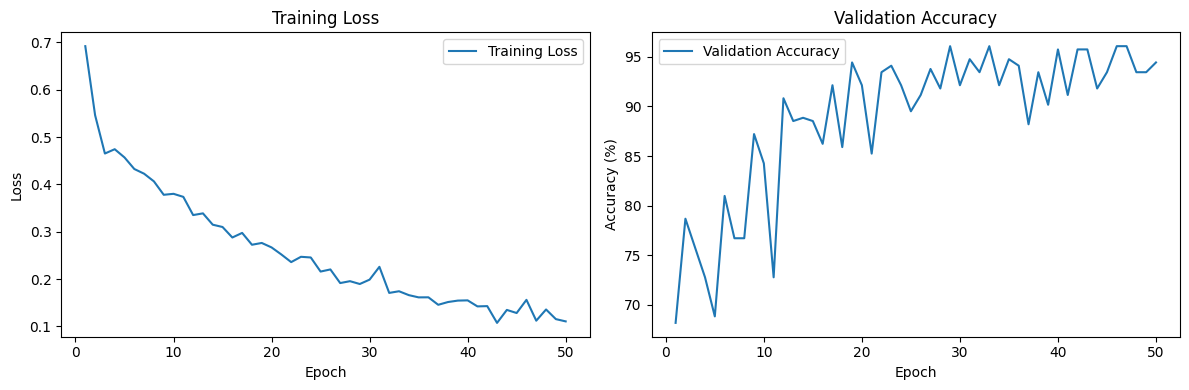

In [7]:
import matplotlib.pyplot as plt
import torch
from tqdm import tqdm

# Define your model, train_loader, val_loader, optimizer, and criterion

num_epochs = 50
train_losses = []  # To store training losses
val_accuracies = []  # To store validation accuracies

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in tqdm(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs.to(device))
        loss = criterion(outputs, labels.to(device))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs.to(device))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels.to(device)).sum().item()

    val_accuracy = correct / total * 100
    val_accuracies.append(val_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {train_loss}')
    print(f'Validation Accuracy: {val_accuracy}%')

print('Training finished.')

# Plot the training progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.title('Validation Accuracy')

plt.tight_layout()
plt.show()


In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in tqdm(test_loader):
        outputs = model(inputs.to(device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(device)).sum().item()
        # print(labels,predicted)

    print(f'Test Accuracy: {correct / total * 100}%')

100%|██████████| 39/39 [00:13<00:00,  2.93it/s]

Test Accuracy: 96.76375404530745%


In [9]:
correct,total

(299, 309)

In [10]:
torch.save(model,'Tumordensenet201.pt')